In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing, filter_NaNpeptides, preprocessing
from msresist.clinical_data import preprocess_data, preprocess_phospho
from msresist.clustering import DDMC
from msresist.figures.figure3B import make_C123_sign, Phospho_by_AXL_levels, Protein_by_AXL_levels, RNA_by_AXL_levels

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1.4, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

### Import CPTAC Data

In [3]:
phos = filter_NaNpeptides(pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:], tmt=2)
prot = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_Protein.csv").drop_duplicates(subset="geneSymbol").set_index("geneSymbol").select_dtypes(include=float).iloc[:, 4:].reset_index()
rna = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_RNAseq.csv").drop_duplicates(subset="geneSymbol")

_, phosR_tumor, _ = preprocess_phospho(phos)
protR, protR_tumor, _ = preprocess_data(prot)
_, rnaR_tumor, _ = preprocess_data(rna)

pmut = pd.read_csv("msresist/data/MS/CPTAC/Patient_Mutations.csv")
pmut = pmut[~pmut["Sample.ID"].str.contains("IR")]

/tmp/ipykernel_1374707/1759114043.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  prot = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_Protein.csv").drop_duplicates(subset="geneSymbol").set_index("geneSymbol").select_dtypes(include=float).iloc[:, 4:].reset_index()


### Import AXL signaling Data

In [4]:
# Import siganling data
X = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# Fit DDMC
ddmc = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)

/home/creixell/AXLomics/msresist/pre_processing.py:121: FutureWarning: The provided callable <function mean at 0x7f9b100a2a20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(X, values=values, index=indices, aggfunc=np.mean)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function mean at 0x7f9b100a2a20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  X = pd.pivot_table(triplicates, values=triplicates[data_headers].columns, index=merging_indices, aggfunc=func_tri)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function std at 0x7f9b100a2b60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided 

### Phosphorylation

In [5]:
c123 = make_C123_sign(X, ddmc)
pho_df = Phospho_by_AXL_levels(protR_tumor, phosR_tumor, pmut, c123)

/home/creixell/AXLomics/msresist/figures/figure3.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdk1["norm p-signal"] *= -1


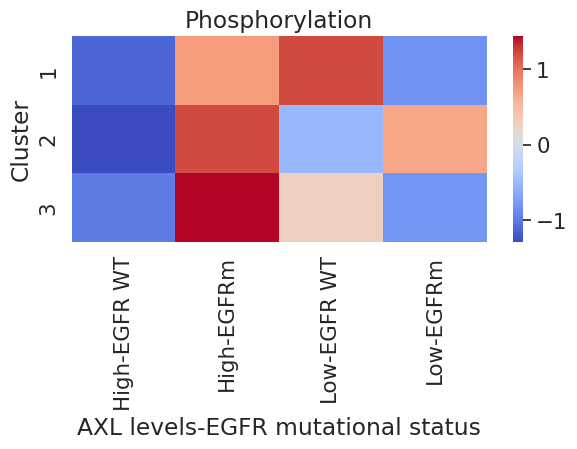

In [6]:
sns.heatmap(pho_df.set_index(["AXL levels", "EGFR mutational status"]).T, cmap="coolwarm", robust=True).set_title("Phosphorylation")
plt.tight_layout()

### Proteomics

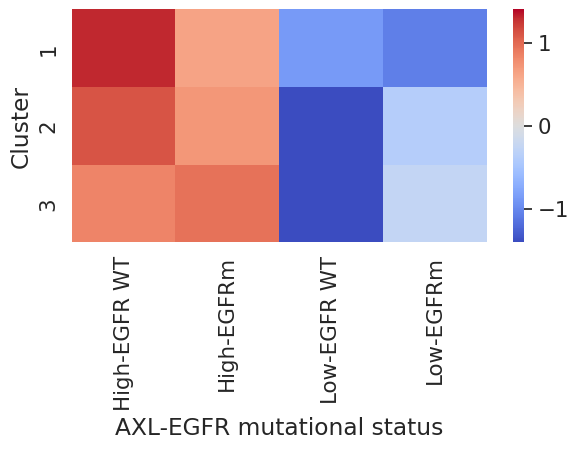

In [ ]:
prot_df = Protein_by_AXL_levels(protR_tumor, pmut, c123)
sns.heatmap(prot_df.set_index(["AXL", "EGFR mutational status"]).T, cmap="coolwarm", robust=True, vmin=-1.4, vmax=1.4)
plt.tight_layout()

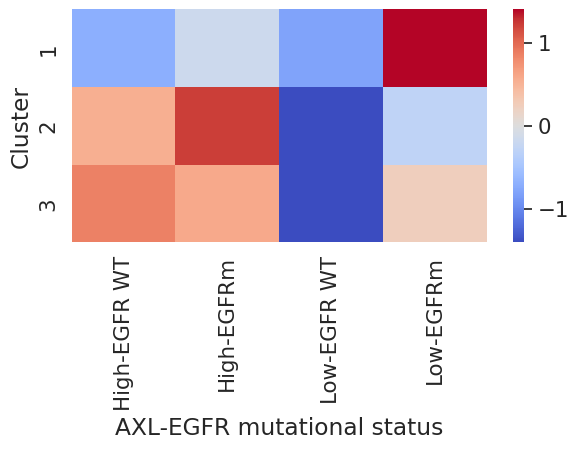

In [9]:
rna_df = RNA_by_AXL_levels(rnaR_tumor, protR_tumor, pmut, c123)
sns.heatmap(rna_df.set_index(["AXL", "EGFR mutational status"]).T, cmap="coolwarm", robust=True, vmin=-1.4, vmax=1.4)
plt.tight_layout()